# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment.

In [2]:
# Loading the excel file into a pandas dataframe.
iris_data = pd.read_excel('iris.xls')

In [3]:
# Display the data
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# number of elements in each dimension (Rows and Columns)
iris_data.shape

(150, 5)

In [5]:
# Summary of the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display the columns in the dataset
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

From the iris dataset :

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width


In [7]:
# check the target variable
iris_data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

As you can see that the feature 'Classification' is the target variable in the iris dataset (whether the iris classifcation there are 50 observations of each species (setosa, versicolor, virginica). Hence it is a Multi-Class Classification Problem

### 2. Do necessary pre-processing steps.

In [8]:
# check the data type for all features in the dataset
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Now, we need to check whether any null or missing values present in the iris dataset

In [9]:
# Calculating the null values present in each columns in the dataset (Before treatment)
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

As you can see that there are 19 null or missing values present in the iris dataset. The features sepal length(SL), sepal width(SW) and petal length(PL) are having the null values. we can treat the null values. Since sepal length(SL), sepal width(SW) and petal length(PL) are float data type so we can fill the missing values with mean/median method.

In [10]:
# Display the data before missing values treatment
iris_data[iris_data.isna().any(axis=1)] # check at least one null values in a row 

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


We can use plots and summary statistics to help identify missing or corrupt data.

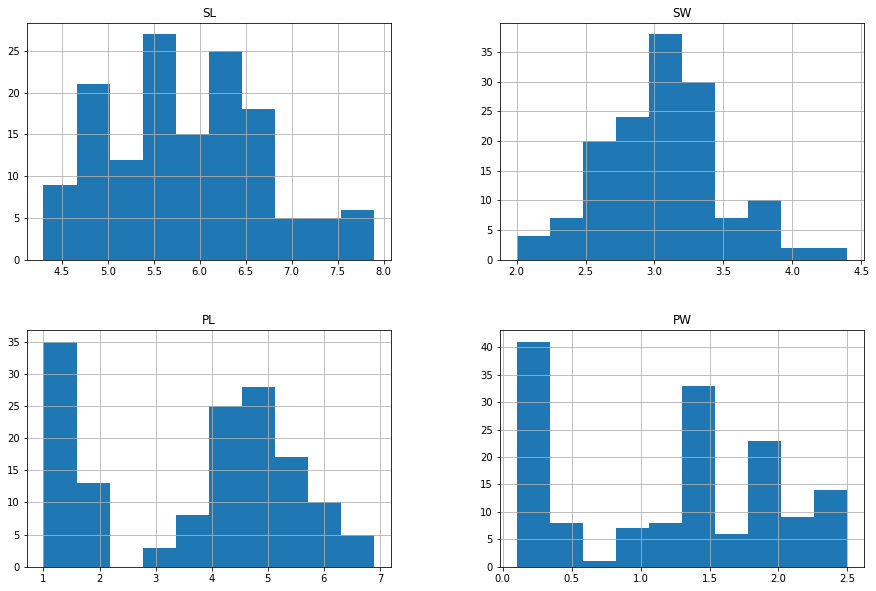

In [11]:
# we can plot the frequency graph
freq_graph = iris_data.select_dtypes(include=['float64'])
freq_graph.hist(figsize=(15,10))
plt.show()

From the above frequency graph we can say that sepal length(SL) and sepal width(SW) are follows almost normal distribution so we can use mean for missing values treatment. And petal length(PL) is slightly different and its not exactly the normal curve bus also almost follows right skewed. So we can go for median to treat the missing values for petal length(PL) feature.

In [12]:
# The Statistical summary of iris dataset
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


> "Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0".

Here we can see the complete statistical summary of count, mean, statndard deviation, minimum value of each column also maximum, 25%, 50% and 75% percentile.

we can use a loop to treat missing or null values for sepal length(SL), sepal width(SW) and petal length(PL)

In [13]:
# fill the missing values for petal length(PL) feature
iris_data['PL'] = iris_data['PL'].fillna(iris_data['PL'].median())

In [14]:
# fill the missing values
missing_val = ['SL','SW']

for i in missing_val:
    iris_data[i] = iris_data[i].fillna(iris_data[i].mean())

In [15]:
# Calculating the null values present in each columns in the dataset (After treatment)
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# Display the data after missing values treatment
iris_data[iris_data.isna().any(axis=1)] # check at least one null values in a row 

,SL,SW,PL,PW,Classification


As you can see that it is treated well for missing values in sepal length(SL), sepal width(SW) and petal length(PL). Now our iris dataset is completely treated with no null or missing values

In [17]:
# number of elements in each dimension (Rows and Columns)
iris_data.shape

(150, 5)

So next we can check and handle outliers in the iris dataset. For finding outliers we can use boxplot.

In [18]:
# Display the columns in the dataset
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

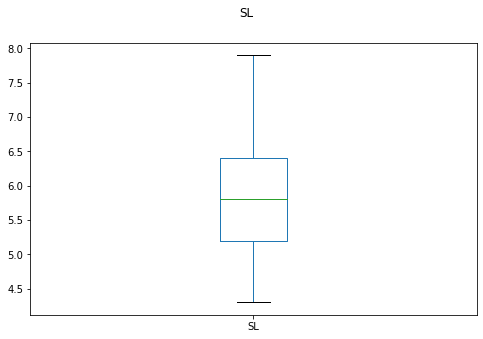

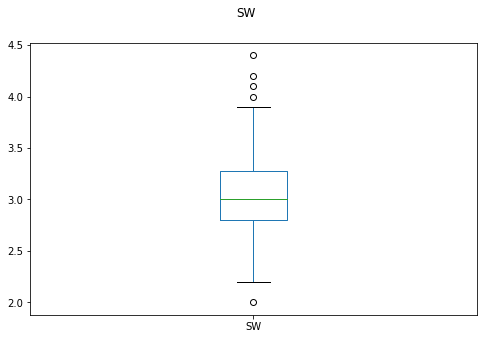

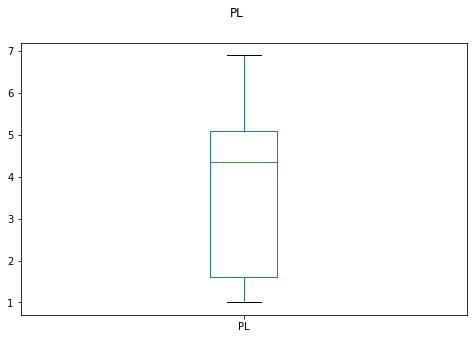

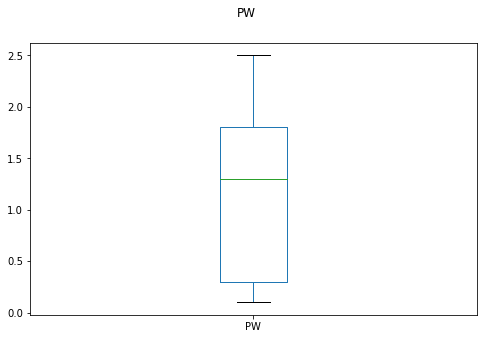

In [19]:
# boxplot before removing the outliers from SL, SW, PL and PW features
for i in iris_data.columns[iris_data.dtypes == float]:
   fig = plt.figure(figsize=(8,5))
   iris_data[i].plot(kind='box')
   fig.suptitle(i)

As you can see that there are some outliers present in the Sepal Width(SW) features so we need to remove the outliers.

**Sepal Width (SW) feature**

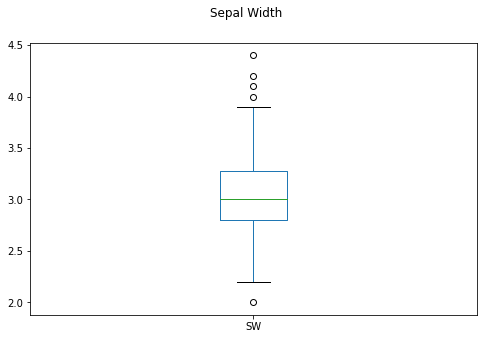

In [20]:
# boxplot before removing the outliers from Sepal Width feature
fig = plt.figure(figsize=(8,5))
iris_data['SW'].plot(kind='box')
fig.suptitle('Sepal Width')
plt.show()

In [21]:
# For removing outliers first we need to check the quartiles. It manages the outliers.
Q1 = np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(iris_data['SW'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

# check the inter quartile range (IQR)
IQR = Q3 - Q1
print('IQR: ',round(IQR,2))

#check the lower and upper limit 
low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",round(low_lm,2))
print("Upper limit is : ",round(upp_lm,2))

'''Normally the datapoints which fall below Q1-1.5(IQR) and above Q3+1.5(IQR) are considered as outliers.
 If the value above the upper limit or below the lower limit we need to remove that outliers.'''

 # display the outilers
outliers = []
for i in iris_data['SW']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the Sepal Width: ",outliers)

Q1:  2.8 
Q2:  3.0 
Q3:  3.25
IQR:  0.45
Lower limit is :  2.12
Upper limit is :  3.92
Outliers in the Sepal Width:  [4.0, 4.4, 4.1, 4.2, 2.0]


As you can see that these values are the outliers in the Sepal Width feature and also we can observe that there is one lower limit value and remaining all the upper limit values as outliers. Now we need to find the index values for the outliers. 

In [22]:
# select the index of these outliers
indx_low = iris_data['SW']<low_lm
outlier_indx_low = iris_data.loc[indx_low].index

indx_upp = iris_data['SW']>upp_lm
outlier_indx_upp= iris_data.loc[indx_upp].index

print('The outliers index value of lower limit is {}'.format(outlier_indx_low),
      '\nand upper limit is {}'.format(outlier_indx_upp))

The outliers index value of lower limit is Int64Index([60], dtype='int64') 
and upper limit is Int64Index([14, 15, 32, 33], dtype='int64')


In [23]:
# drop these index for removing outliers
iris_data.drop(outlier_indx_low, inplace=True)
iris_data.drop(outlier_indx_upp, inplace=True)

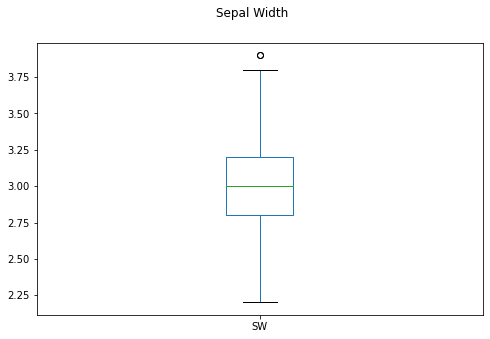

In [24]:
# boxplot after removing the outliers from Sepal Width feature
fig = plt.figure(figsize=(8,5))
iris_data['SW'].plot(kind='box')
fig.suptitle('Sepal Width')
plt.show()

From the above boxplot we can see that we reduced the outliers from the Sepal Width(SW) feature.

In [25]:
# Summary of the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [26]:
# Statistical Summary of the data
iris_data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.847586,1.226897
std,0.816690,0.374355,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


For filling missing values with mean and median did not introduce observable changes in the iris dataset

In [27]:
# Label Encode with target 'Classification' feature
'''In Machine Learning, we cannot continue with categorical features so we need to convert it into numerical form. 
Here, Classification feature has two or more classes, hence we used label encoder to convert the categorical feature 
in to numerical form.'''

from sklearn.preprocessing import LabelEncoder
iris_data['Classification'] = LabelEncoder().fit_transform(iris_data['Classification'])

In [28]:
# check the target variable after label encode
iris_data['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

As you can see that it is converted with classes 0, 1 and 2.

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [29]:
# Function to check model performances
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [30]:
# Extract feature columns
feature_cols = list(iris_data.columns[:-1])

# Extract target column 'CLassification'
target_col = iris_data.columns[-1] 

# Separate the data into feature data and target data (X and y, respectively),this method is called feature selection
X = iris_data[feature_cols]
y = iris_data[target_col]
print(f'Feature shape: {X.shape}')

Feature shape: (145, 4)


In [31]:
# splitting the data into train and test 
from sklearn.model_selection import train_test_split
# training points (approximately 80%) and testing points (approximately 20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 116 samples.
Testing set has 29 samples.


### Model 1. Multinomial Logistic regression

In [32]:
# Multinomial Logistic regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') # solver - Algorithm to use in the optimization
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [33]:
# Calling function to check model performances
check_model_metrices(y_test, lr_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


For good model, accuracy and F1 score should be maximum possible. As per the Multinomial Logistic regression model has performed well with an accuracy of 93.10% with just 2 misclassification.

### Model 2: K-Nearest Neighbors(KNN)

In [34]:
# K-Nearest Neighbors(KNN) Model
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] #find the optimum k values
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred) # find the maximum accuracy
  acc_values.append(acc)

acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

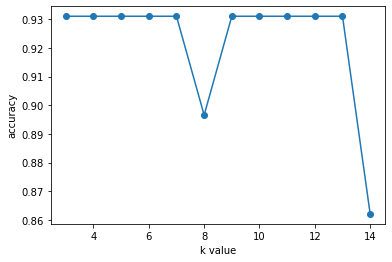

In [35]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

As you can see best k value is 3

In [36]:
# now we can make the model with k value as 3
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, y_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


As per the  K-Nearest Neighbors(KNN) model has performed well with an accuracy of 93.10% with just 2 misclassification.

Accuracy and F1 Score is much improvement in KNN model

### Model 3: SVM(Support Vector Machine) with multi-class


SVM Kernel have 3 types
1. Linear
2. Polynomial
3. Radial Basis Function (RBF)

In [37]:
# Linear SVM
from sklearn.svm import SVC
# decision_function_shape is set to One-vs_One for multi-class
linear = SVC(kernel='linear', decision_function_shape='ovo') 
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [38]:
# Calling function to check model performances
check_model_metrices(y_test, linear_pred)

Model Accuracy =  0.896551724137931
Model Precision =  0.896551724137931
Model Recall =  0.896551724137931
Model F1 Score =  0.896551724137931
Confusion Matrix = 
 [[9 0 0]
 [0 8 1]
 [0 2 9]]


As per the SVM(Support Vector Machine) with multi-class using linear kernel model has performed well with an accuracy of 89.66% with just 3 misclassification.

Accuracy and F1 Score is not much improvement with Logistic Regression and KNN.

In [39]:
# Polynomial SVM
# decision_function_shape is set to One-vs_One for multi-class
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)

In [40]:
# Calling function to check model performances
check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.9655172413793104
Model Precision =  0.9655172413793104
Model Recall =  0.9655172413793104
Model F1 Score =  0.9655172413793104
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


As per the SVM(Support Vector Machine) with multi-class using polinomial kernel model has performed well with an accuracy of 96.55% with just 1 misclassification.

Accuracy and F1 Score is much improvement with Logistic Regression and SVM linear kernel and KNN.

In [41]:
# Radial Basis Function (RBF) SVM
# decision_function_shape is set to One-vs_One for multi-class
rbf = SVC(kernel='rbf', decision_function_shape='ovo') 
rbf.fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

In [42]:
# Calling function to check model performances
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.8620689655172413
Model Precision =  0.8620689655172413
Model Recall =  0.8620689655172413
Model F1 Score =  0.8620689655172413
Confusion Matrix = 
 [[9 0 0]
 [0 8 1]
 [0 3 8]]


As per the SVM(Support Vector Machine) with multi-class using RBF kernel model has performed well with an accuracy of 86.21% with just 4 misclassification.

Accuracy and F1 Score is not improved with other classification models (Logistic Regression and SVM linear kernel/Polynomial and KNN).

### Model 4: Decision Trees

In [43]:
# Decision Trees Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [44]:
# Calling function to check model performances
check_model_metrices(y_test, dt_pred)

Model Accuracy =  0.896551724137931
Model Precision =  0.896551724137931
Model Recall =  0.896551724137931
Model F1 Score =  0.896551724137931
Confusion Matrix = 
 [[9 0 0]
 [0 8 1]
 [0 2 9]]


As per the Decision Trees model has performed well with an accuracy of 89.66% with just 3 misclassification.

Accuracy and F1 Score is not improved with Logistic Regression and SVM Polynomial and KNN but slighly improved comparing with SVM Radial Basis Function (RBF).

### Model 5: Random Forest

In [45]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [46]:
# Calling function to check model performances
check_model_metrices(y_test, rf_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


As per the Random Forest model has performed well with an accuracy of 93.10% with just 1 misclassification.

Accuracy and F1 Score is not much improvement with SVM Polynomial and improved comparing with SVM linear/RBF and Decision tree.

## Scale the Models

**For getting better scores of each models we can go for with scaling method**

In [47]:
# The Statistical summary of iris dataset
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,145.0,5.870287,0.816690,4.3,5.2,5.855944,6.4,7.9
SW,145.0,3.025489,0.374355,2.2,2.8,3.000000,3.2,3.9
PL,145.0,3.847586,1.712265,1.0,1.6,4.350000,5.1,6.9
PW,145.0,1.226897,0.758219,0.1,0.3,1.300000,1.8,2.5
Classification,145.0,1.027586,0.816027,0.0,0.0,1.000000,2.0,2.0


In [48]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the standard scaling on both X_train and y_train
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

### Model 1. Multinomial Logistic regression

In [49]:
# After scaling the Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') # solver - Algorithm to use in the optimization
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, lr_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[9 0 0]
 [0 9 0]
 [0 2 9]]


### Model 2: K-Nearest Neighbors(KNN)

In [50]:
# After scaling the K-Nearest Neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] #find the optimum k values
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred) # find the maximum accuracy
  acc_values.append(acc)

acc_values

[0.9310344827586207,
 0.8620689655172413,
 0.896551724137931,
 0.8620689655172413,
 0.896551724137931,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.896551724137931,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

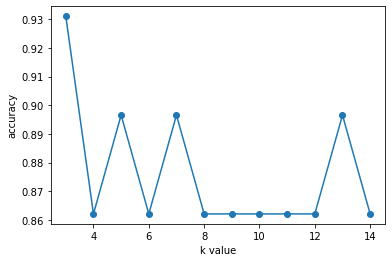

In [51]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [52]:
# now we can make the model with k value as 3
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, y_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


### Model 3: SVM(Support Vector Machine) with multi-class

In [53]:
# After scaling the Linear SVM
from sklearn.svm import SVC
# decision_function_shape is set to One-vs_One for multi-class
linear = SVC(kernel='linear', decision_function_shape='ovo') 
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, linear_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [54]:
# After scaling the Polynomial SVM
# decision_function_shape is set to One-vs_One for multi-class
poly = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, poly_pred)

Model Accuracy =  0.8620689655172413
Model Precision =  0.8620689655172413
Model Recall =  0.8620689655172413
Model F1 Score =  0.8620689655172413
Confusion Matrix = 
 [[9 0 0]
 [0 9 0]
 [0 4 7]]


In [55]:
# After scaling the Radial Basis Function (RBF) SVM
# decision_function_shape is set to One-vs_One for multi-class
rbf = SVC(kernel='rbf', decision_function_shape='ovo') 
rbf.fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.9310344827586207
Model Precision =  0.9310344827586207
Model Recall =  0.9310344827586207
Model F1 Score =  0.9310344827586207
Confusion Matrix = 
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


### Model 4: Decision Trees

In [56]:
# After scaling the Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, dt_pred)

Model Accuracy =  0.896551724137931
Model Precision =  0.896551724137931
Model Recall =  0.896551724137931
Model F1 Score =  0.896551724137931
Confusion Matrix = 
 [[9 0 0]
 [0 8 1]
 [0 2 9]]


### Model 5: Random Forest

In [57]:
# After scaling the Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calling function to check model performances
check_model_metrices(y_test, rf_pred)

Model Accuracy =  0.8620689655172413
Model Precision =  0.8620689655172413
Model Recall =  0.8620689655172413
Model F1 Score =  0.8620689655172413
Confusion Matrix = 
 [[9 0 0]
 [0 8 1]
 [0 3 8]]


# Final Verdict

**Before Scaling the model Accuracy scores:**

1. Multinomial Logistic regression - 93.10%
2. K-Nearest Neighbors(KNN) - 93.10%
3. SVM(Support Vector Machine) with multi-class
 * Linear - 89.66%
 * Polynomial - 96.55%
 * Radial Basis Function (RBF) - 86.21%
4. Decision Trees - 89.66%
5. Random Forest - 93.10%

**After Scaling the model Accuracy scores:**

1. Multinomial Logistic regression - 93.10%
2. K-Nearest Neighbors(KNN) - 93.10%
3. SVM(Support Vector Machine) with multi-class
 * Linear - 93.10%
 * Polynomial - 86.21%
 * Radial Basis Function (RBF) - 93.10%
4. Decision Trees - 89.66%
5. Random Forest - 86.21% 

**From the analysis, Before scaling and after scaling the models:**

1. In SVM polynomial and Random Forest, before scaling the models scored good accuracy of 96.55% and 93.10% respectively but after scaling the accuracy score is decreased with 93.10% and 86.21% so on.
2. Before scaling and after scaling, there is no change in the Multinomial Logistic regression, K-Nearest Neighbors(KNN) and Decision Tree models with the same accuracy of 93.10%.
3. there is a further betterment in SVM(Support Vector Machine) Kernel using Linear and Radial Basis Function (RBF) models. Before scaling the accuracy was 89.66% and 86.21% respectively and after scaling the accuracy is the same with 93.10%.
